In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [131]:
data = pd.read_csv("data.csv", delimiter=',')
data

uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19995  7179d2f6c4ad50a17d014ca1d2815156  2015-12-01 10:15:43 +0000   
19996  71ac419198359d37b8fe5e3fffdfee09  2015-12-01 10:15:43 +0000   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1      http://www.flipkart.com/fabhomedecor-fabric-do...   
2      http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3      http://www.flipkart.com/alisha-solid-women-s-c...   
4      http://www.flipkart.com/sicons-all-purpose-arn...   
...                                                  ...   
19995  http://www.flipkart.com/walldesign-small-vinyl...   
19996  http://www.flipkart.com/wallmantra-large-vinyl...   
19997  http://www.flipkart.com/elite-collection-mediu...   
19998  http://www.flipkart.com/elite-collection-mediu...   
19999  http://www.flipkart.com/elite-collection-mediu...   

                                  product_name  \
0          Alisha Solid Women's Cycling Shorts   
1          FabHomeDecor Fabric Double Sofa Bed   
2                                   AW Bellies   
3          Alisha Solid Women's Cycling Shorts   
4        Sicons All Purpose Arnica Dog Shampoo   
...                                        ...   
19995           WallDesign Small Vinyl Sticker   
19996  Wallmantra Large Vinyl Stickers Sticker   
19997  Elite Collection Medium Acrylic Sticker   
19998  Elite Collection Medium Acrylic Sticker   
19999  Elite Collection Medium Acrylic Sticker   

                                   product_category_tree               pid  \
0      ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1      ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2      ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3      ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4      ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   
...                                                  ...               ...   
19995  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE7KFJAKSTDY9G   
19996  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE9F5URNQGJCGH   
19997  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE7VAYDKQZEBSD   
19998  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE8YSVEPPCZ42Y   
19999  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88KN9ZDSGZKY   

       retail_price  discounted_price  \
0             999.0             379.0   
1           32157.0           22646.0   
2             999.0             499.0   
3             699.0             267.0   
4             220.0             210.0   
...             ...               ...   
19995        1500.0             730.0   
19996        1429.0            1143.0   
19997        1299.0             999.0   
19998        1499.0            1199.0   
19999        1499.0             999.0   

                                                   image  \
0      ["http://img5a.flixcart.com/image/short/u/4/a/...   
1      ["http://img6a.flixcart.com/image/sofa-bed/j/f...   
2      ["http://img5a.flixcart.com/image/shoe/7/z/z/r...   
3      ["http://img5a.flixcart.com/image/short/6/2/h/...   
4      ["http://img5a.flixcart.com/image/pet-shampoo/...   
...                                                  ...   
19995  ["http://img

# 1. Découverte du dataset


In [132]:
# Informations sur les types de données, les valeurs manquantes...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [133]:
# Vérifie les valeurs manquantes
print(data.isnull().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64


In [134]:
# Afficher les valeurs uniques pour chaque colonne
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Colonne {column}: {len(unique_values)} valeurs uniques')
    print(unique_values)
    print('\n')


Colonne uniq_id: 20000 valeurs uniques
['c2d766ca982eca8304150849735ffef9' '7f7036a6d550aaa89d34c77bd39a5e48'
 'f449ec65dcbc041b6ae5e6a32717d01b' ... '93e9d343837400ce0d7980874ece471c'
 '669e79b8fa5d9ae020841c0c97d5e935' 'cb4fa87a874f715fff567f7b7b3be79c']


Colonne crawl_timestamp: 371 valeurs uniques
['2016-03-25 22:59:23 +0000' '2016-03-31 15:22:07 +0000'
 '2016-01-03 20:56:50 +0000' '2016-05-11 09:26:02 +0000'
 '2016-06-24 16:24:13 +0000' '2016-03-03 07:19:26 +0000'
 '2016-05-26 06:31:26 +0000' '2016-04-05 17:56:58 +0000'
 '2016-04-30 03:22:56 +0000' '2016-06-20 08:49:52 +0000'
 '2016-05-17 01:21:10 +0000' '2016-06-06 22:03:00 +0000'
 '2015-12-03 04:43:13 +0000' '2015-12-04 07:25:36 +0000'
 '2016-03-05 01:25:23 +0000' '2016-06-12 08:33:38 +0000'
 '2016-04-04 16:06:42 +0000' '2016-06-05 19:23:11 +0000'
 '2016-04-24 05:28:49 +0000' '2016-01-06 18:20:45 +0000'
 '2016-03-04 17:21:37 +0000' '2016-06-23 09:34:26 +0000'
 '2016-05-23 07:34:15 +0000' '2016-06-23 20:12:26 +0000'
 '2016-06-28

# 2. Prétraitement 


#### A. Suppression des colonnes inutiles


In [135]:
# Liste des colonnes à supprimer
columns_to_drop = ['uniq_id', 'pid', 'image', 'product_url', 'crawl_timestamp']

# Suppression des colonnes
data = data.drop(columns=columns_to_drop)
data.head()

product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree  retail_price  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...         999.0   
1  ["Furniture >> Living Room Furniture >> Sofa B...       32157.0   
2  ["Footwear >> Women's Footwear >> Ballerinas >...         999.0   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...         699.0   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...         220.0   

   discounted_price  is_FK_Advantage_product  \
0             379.0                    False   
1           22646.0                    False   
2             499.0                    False   
3             267.0                    False   
4             210.0                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Installati...  
2  {"product_specification"=>[{"key"=>"Ideal For"...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Pet Type",...

#### B. Traitement des valeurs manquantes

In [136]:
# Remplacer les valeurs manquantes dans 'retail_price' et 'discounted_price' par la moyenne
data['retail_price'].fillna(data['retail_price'].mean(), inplace=True)
data['discounted_price'].fillna(data['discounted_price'].mean(), inplace=True)
data[['retail_price', 'discounted_price']]

retail_price  discounted_price
0             999.0             379.0
1           32157.0           22646.0
2             999.0             499.0
3             699.0             267.0
4             220.0             210.0
...             ...               ...
19995        1500.0             730.0
19996        1429.0            1143.0
19997        1299.0             999.0
19998        1499.0            1199.0
19999        1499.0             999.0

[20000 rows x 2 columns]

In [137]:
data[['product_rating', 'overall_rating']]

product_rating       overall_rating
0      No rating available  No rating available
1      No rating available  No rating available
2      No rating available  No rating available
3      No rating available  No rating available
4      No rating available  No rating available
...                    ...                  ...
19995  No rating available  No rating available
19996  No rating available  No rating available
19997  No rating available  No rating available
19998  No rating available  No rating available
19999  No rating available  No rating available

[20000 rows x 2 columns]

In [138]:
 #Remplacer 'No rating available' par NaN et convertir en type numérique
data['product_rating'] = pd.to_numeric(data['product_rating'].replace('No rating available', np.nan), errors='coerce')
data['overall_rating'] = pd.to_numeric(data['overall_rating'].replace('No rating available', np.nan), errors='coerce')
data[['product_rating', 'overall_rating']]

product_rating  overall_rating
0                 NaN             NaN
1                 NaN             NaN
2                 NaN             NaN
3                 NaN             NaN
4                 NaN             NaN
...               ...             ...
19995             NaN             NaN
19996             NaN             NaN
19997             NaN             NaN
19998             NaN             NaN
19999             NaN             NaN

[20000 rows x 2 columns]

In [140]:
# Remplacer les 'NaN' par la médiane
median_product_rating = data['product_rating'].median()
data['product_rating'].fillna(median_product_rating, inplace=True)
median_overall_rating = data['overall_rating'].median()
data['overall_rating'].fillna(median_overall_rating, inplace=True)
data[['product_rating', 'overall_rating']]

product_rating  overall_rating
0                 4.0             4.0
1                 4.0             4.0
2                 4.0             4.0
3                 4.0             4.0
4                 4.0             4.0
...               ...             ...
19995             4.0             4.0
19996             4.0             4.0
19997             4.0             4.0
19998             4.0             4.0
19999             4.0             4.0

[20000 rows x 2 columns]

In [141]:
data['brand']

0                  Alisha
1            FabHomeDecor
2                      AW
3                  Alisha
4                  Sicons
               ...       
19995          WallDesign
19996          Wallmantra
19997    Elite Collection
19998    Elite Collection
19999    Elite Collection
Name: brand, Length: 20000, dtype: object

In [142]:
data['brand'].fillna('Unknown', inplace=True)
missing_values = data['brand'].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne 'brand': {missing_values}")

Nombre de valeurs manquantes dans la colonne 'brand': 0


In [143]:
# Liste des colonnes textuelles dans votre jeu de données
colonnes_textuelles = ['product_name', 'product_category_tree', 'description', 'brand', 'product_specifications']

# Remplacer les valeurs manquantes par une chaîne vide
data[colonnes_textuelles] = data[colonnes_textuelles].fillna('')

# Afficher les informations mises à jour sur les valeurs manquantes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             20000 non-null  object 
 1   product_category_tree    20000 non-null  object 
 2   retail_price             20000 non-null  float64
 3   discounted_price         20000 non-null  float64
 4   is_FK_Advantage_product  20000 non-null  bool   
 5   description              20000 non-null  object 
 6   product_rating           20000 non-null  float64
 7   overall_rating           20000 non-null  float64
 8   brand                    20000 non-null  object 
 9   product_specifications   20000 non-null  object 
dtypes: bool(1), float64(4), object(5)
memory usage: 1.4+ MB
None


In [144]:
# Statistiques descriptives
data.describe()

retail_price  discounted_price  product_rating  overall_rating
count   20000.000000      20000.000000    20000.000000    20000.000000
mean     2979.206104       1973.401767        3.982165        3.982165
std      8992.052501       7319.270861        0.387631        0.387631
min        35.000000         35.000000        1.000000        1.000000
25%       675.000000        350.000000        4.000000        4.000000
50%      1049.000000        550.000000        4.000000        4.000000
75%      1999.000000       1000.000000        4.000000        4.000000
max    571230.000000     571230.000000        5.000000        5.000000

## Visualisation

### Distribution des prix (Histogramme) :


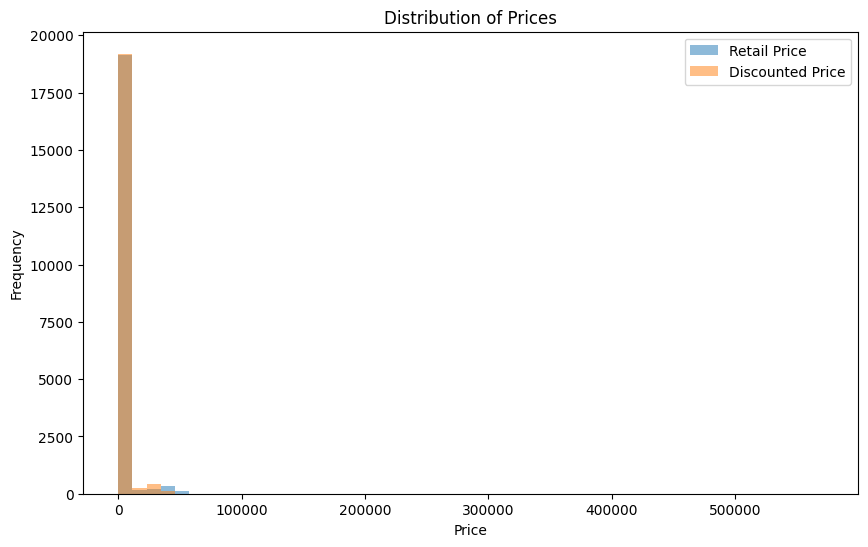

In [145]:
import matplotlib.pyplot as plt

# Distribution des prix
plt.figure(figsize=(10, 6))
plt.hist(data['retail_price'].dropna(), bins=50, alpha=0.5, label='Retail Price')
plt.hist(data['discounted_price'].dropna(), bins=50, alpha=0.5, label='Discounted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Prices')
plt.show()


### Distribution des évaluations (Diagramme en barres) :


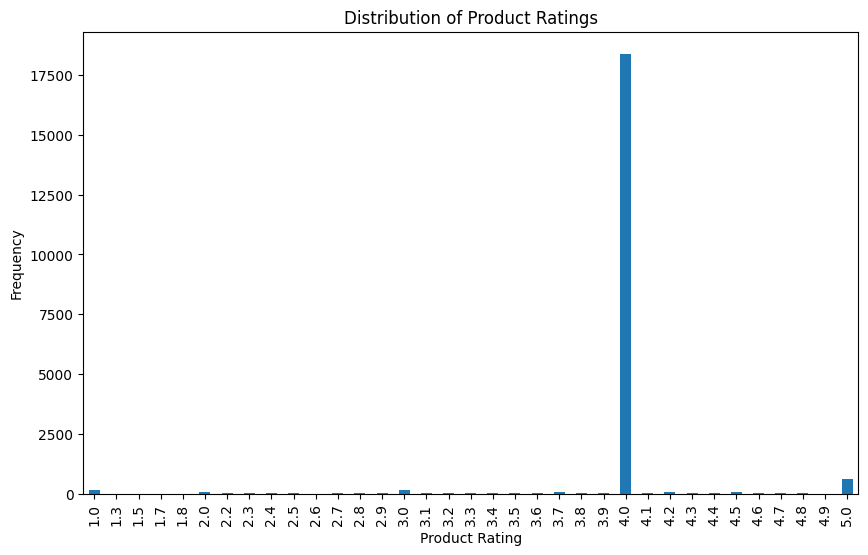

In [146]:
import matplotlib.pyplot as plt

# Distribution des évaluations
plt.figure(figsize=(10, 6))
data['product_rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()


### Catégories de produits (Nuage de mots) :


In [147]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


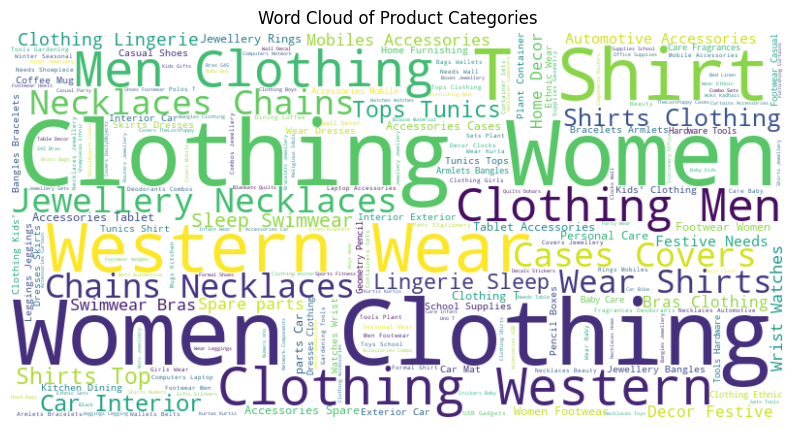

In [148]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nuage de mots des catégories de produits
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['product_category_tree']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Categories')
plt.show()


### Marques populaires (Diagramme en barres) :

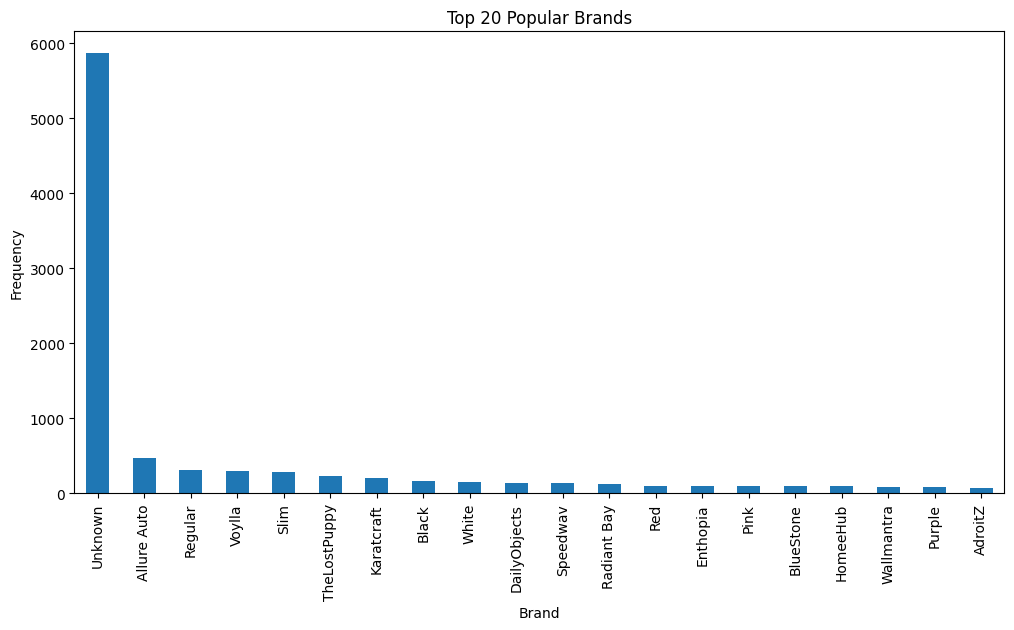

In [149]:
import matplotlib.pyplot as plt

# Marques populaires
plt.figure(figsize=(12, 6))
data['brand'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Top 20 Popular Brands')
plt.show()

## Entraînement du modèle (collaboratif) basé sur les prix


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity

In [179]:
# Sélection des colonnes pertinentes pour la recommandation basée sur le prix
prix_cols = ['retail_price', 'discounted_price']

# Sélection des données pertinentes
prix_data = data[prix_cols]

# Normalisation des données
prix_data_normalized = MinMaxScaler().fit_transform(prix_data)

In [180]:
# Division en ensembles d'entraînement et de test
X_train, X_test = train_test_split(prix_data_normalized, test_size=0.2, random_state=42)

In [181]:
# Calcul de la similarité cosine entre les produits
similarity_matrix_train = cosine_similarity(X_train)
similarity_matrix_train

array([[1.        , 0.96867484, 0.96881552, ..., 0.96937535, 0.96741867,
        0.9990066 ],
       [0.96867484, 1.        , 0.99999984, ..., 0.99999598, 0.99998745,
        0.95664627],
       [0.96881552, 0.99999984, 1.        , ..., 0.99999742, 0.99998445,
        0.9568113 ],
       ...,
       [0.96937535, 0.99999598, 0.99999742, ..., 1.        , 0.99996922,
        0.95746857],
       [0.96741867, 0.99998745, 0.99998445, ..., 0.99996922, 1.        ,
        0.95517524],
       [0.9990066 , 0.95664627, 0.9568113 , ..., 0.95746857, 0.95517524,
        1.        ]])

In [182]:
# Fonction de recommandation basée sur la similarité cosinus
def recommend_products_price(product_index, similarity_matrix, n=5):
    # Récupérer les indices des produits similaires
    similar_products = np.argsort(similarity_matrix[product_index])[::-1][1:n+1]
    return similar_products

In [183]:
# Fonction d'évaluation du modèle
def evaluate_model_price(X_train, similarity_matrix, actual_prices):
    predicted_prices = []
    for i in range(X_train.shape[0]):
        # Recommander les produits similaires
        similar_products = recommend_products_price(i, similarity_matrix)
        # Calculer la prédiction comme la moyenne des prix des produits similaires
        predicted_price = np.mean(actual_prices[similar_products])
        predicted_prices.append(predicted_price)
    # Calculer l'erreur quadratique moyenne (MSE)
    mse = mean_squared_error(actual_prices, predicted_prices)
    return mse

In [184]:
# Utilisation de 'retail_price' pour l'exemple
mse_price_test = evaluate_model_price(X_test, cosine_similarity(X_test), X_test[:, 0])
print(f"Mean Squared Error (MSE) for price recommendation on the test set: {mse_price_test}")

Mean Squared Error (MSE) for price recommendation on the test set: 0.00016695853590731945


## Modèle de recommandation basé sur le contenu

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Supposons que 'data' est votre DataFrame contenant les données
# Assurez-vous que les colonnes nécessaires sont présentes et traitées (nettoyage, normalisation, etc.)

# Concaténer les colonnes textuelles pertinentes
data['content'] = data['product_name'] + ' ' + data['product_category_tree'] + ' ' + data['description']

# Remplacer les valeurs manquantes par une chaîne vide
data['content'] = data['content'].fillna('')

# Utiliser TfidfVectorizer pour convertir le texte en vecteurs TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['content'])

# Calculer la similarité cosinus entre les produits
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# Fonction de recommandation basée sur la similarité cosinus
def recommend_products(product_index, cosine_similarities=cosine_similarities):
    # Obtenir les scores de similarité pour le produit donné
    sim_scores = list(enumerate(cosine_similarities[product_index]))

    # Trier les produits en fonction des scores de similarité
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtenir les indices des produits similaires
    product_indices = [x[0] for x in sim_scores]

    # Retourner les 5 premiers produits recommandés (peut être ajusté)
    return data['product_name'].iloc[product_indices[1:6]]

# Exemple d'utilisation : recommander des produits similaires au produit d'indice 0
recommendations = recommend_products(0)
print(recommendations)


6     Alisha Solid Women's Cycling Shorts
3     Alisha Solid Women's Cycling Shorts
9     Alisha Solid Women's Cycling Shorts
13    Alisha Solid Women's Cycling Shorts
15    Alisha Solid Women's Cycling Shorts
Name: product_name, dtype: object
